In [1]:
#pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [50]:
import psycopg2
import config_lake as creds
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [5]:
connect()

Connected!


(<connection object at 0x0000020B068678C0; dsn: 'user=TeamX password=xxx dbname=postgres host=lakerds.czuthh2ifupq.us-east-1.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x0000020B04716660; closed: 0>)

In [6]:
# Select data 
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
conn = psycopg2.connect(conn_string)
cur = conn.cursor()

In [7]:
postgreSQL_select_Query = "select * from ElectricityProductionPlants"

cur.execute(postgreSQL_select_Query)
print("Selecting rows from table using cursor.fetchall")
df_records = cur.fetchall()

Selecting rows from table using cursor.fetchall


In [10]:
df = pd.DataFrame(df_records, columns = ['xtf_id','PostCode','Municipality', 'Canton', 'BeginningOfOperation',
                                         'MainCategory', 'SubCategory', 'InitialPower','TotalPower'])
df.head()

,xtf_id,PostCode,Municipality,Canton,BeginningOfOperation,MainCategory,SubCategory,InitialPower,TotalPower
0,14727,4147,Aesch BL,BL,2009,Other renewable energies,Photovoltaic,14.65,18.81
1,14728,5082,Kaisten,AG,2011,Other renewable energies,Photovoltaic,5.80,5.80
2,10164,3114,Wichtrach,BE,2008,Other renewable energies,Photovoltaic,3.00,3.00
3,10794,3753,Oey,BE,2008,Other renewable energies,Photovoltaic,8.40,8.40
4,9476,8340,Hinwil,ZH,2006,Other renewable energies,Photovoltaic,4.80,4.80


In [39]:
# Data Quality
df.info()
# Checking uniqueness of ids etc.
print('Unique ids:', df['xtf_id'].nunique(), 'Length df ids:', len(df['xtf_id']))
print('Unique cantons:', df['Canton'].nunique())
print('Unique Post codes:', df['PostCode'].nunique(), '; Swiss total: 4405 (2019)', '; Unique Municipalities:', df['Municipality'].nunique(), '; Discrepancy due to small villages without own post code (e.g 6204)')
print('Unique Main categories:', df['MainCategory'].nunique(), 'Unique Sub categories:', df['SubCategory'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141188 entries, 0 to 141187
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   xtf_id                141188 non-null  int64  
 1   PostCode              141188 non-null  int64  
 2   Municipality          141188 non-null  object 
 3   Canton                141188 non-null  object 
 4   BeginningOfOperation  141188 non-null  int64  
 5   MainCategory          141188 non-null  object 
 6   SubCategory           141188 non-null  object 
 7   InitialPower          141188 non-null  float64
 8   TotalPower            141188 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.7+ MB
Unique ids: 141188 Length df ids: 141188
Unique cantons: 26
Unique Post codes: 3230 ; Swiss total: 4405 (2019) ; Unique Municipalities: 6528 ; Discrepancy due to small villages without own post code (e.g 6204)
Unique Main categories: 4 Unique Sub categorie

In [48]:
# Checking year of Beginning of operation
list_years = sorted(list(df['BeginningOfOperation'].drop_duplicates()))
list_years
df_18xx = df.loc[df['BeginningOfOperation'] <= 1899]
df_18xx

,xtf_id,PostCode,Municipality,Canton,BeginningOfOperation,MainCategory,SubCategory,InitialPower,TotalPower
136635,58160,6014,Littau,LU,1886,Hydroelectric power,Hydroelectric power,740.0,740.0
136656,60031,5000,Aarau,AG,1894,Hydroelectric power,Hydroelectric power,16000.0,16000.0
136684,60501,6370,Oberdorf,NW,1890,Hydroelectric power,Hydroelectric power,240.0,240.0
136697,61012,1352,Agiez,VD,1895,Hydroelectric power,Hydroelectric power,2220.0,2220.0
136715,61130,8762,Schwanden,GL,1899,Hydroelectric power,Hydroelectric power,2400.0,2400.0
136719,61183,6817,Maroggia,TI,1894,Hydroelectric power,Hydroelectric power,950.0,950.0
136722,61213,6340,Baar,ZG,1891,Hydroelectric power,Hydroelectric power,5315.0,5315.0
136723,61215,6340,Baar,ZG,1897,Hydroelectric power,Hydroelectric power,1747.0,1747.0
136736,61270,2340,La Goule,JU,1894,Hydroelectric power,Hydroelectric power,5000.0,5000.0
139960,51290,1669,Montbovon,FR,1896,Hydroelectric power,Hydroelectric power,27800.0,27800.0


In [56]:
# Main categories
list_MainCategory = sorted(list(df['MainCategory'].drop_duplicates()))
list_MainCategory

['Fossil fuel',
 'Hydroelectric power',
 'Nuclear energy',
 'Other renewable energies']

In [65]:
# Plotting energy production by year / Total power / MainCategory
# Set up
list_years = sorted(list(df['BeginningOfOperation'].drop_duplicates()))
Hydro = df.loc[df['MainCategory'] == 'Hydroelectric power'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Renewable = df.loc[df['MainCategory'] == 'Other renewable energies'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Fossil = df.loc[df['MainCategory'] == 'Fossil fuel'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
Nuclear = df.loc[df['MainCategory'] == 'Nuclear energy'].groupby('BeginningOfOperation').agg({'TotalPower': ['sum', 'mean']})
list(Hydro.columns)

[('TotalPower', 'sum'), ('TotalPower', 'mean')]

In [71]:
Hydro_means = Hydro['TotalPower', 'mean']
Hydro_means

BeginningOfOperation
1863     200.000000
1886     740.000000
1888     180.000000
1890     240.000000
1891    5315.000000
           ...     
2018    1293.729412
2019    1045.421053
2020    1622.483182
2021    2435.636364
2022     230.250000
Name: (TotalPower, mean), Length: 130, dtype: float64

In [72]:
type(Hydro_means)

pandas.core.series.Series

ValueError: shape mismatch: objects cannot be broadcast to a single shape

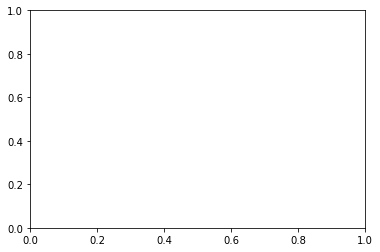

In [66]:
# Plot
labels = list_years
Hydro_means = Hydro['TotalPower', 'sum']
Renewable_means = [25, 32, 34, 20, 25]

men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

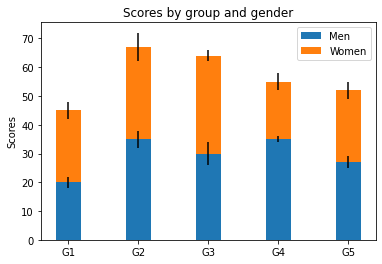

In [58]:
# Plot
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()